# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["imperial"]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

        
print("Beginning Data Retrieval \n---------------------") 
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 1
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        time.sleep(1.01)

print("-----------------------------\nData Retrieval Complete \n---------------------")


Beginning Data Retrieval 
-----------------------------
Beginning Data Retrieval 
---------------------
City not found. Skipping...
Processing Record 1 of Set 1 : altay
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : bluff
Processing Record 5 of Set 1 : matamoros
Processing Record 6 of Set 1 : dingle
Processing Record 7 of Set 1 : mount isa
Processing Record 8 of Set 1 : bredasdorp
Processing Record 9 of Set 1 : say
Processing Record 10 of Set 1 : lebu
Processing Record 11 of Set 1 : kaitangata
Processing Record 12 of Set 1 : nikolskoye
Processing Record 13 of Set 1 : tiksi
Processing Record 14 of Set 1 : ostrovnoy
Processing Record 15 of Set 1 : jamestown
Processing Record 16 of Set 1 : hithadhoo
Processing Record 17 of Set 1 : chokurdakh
Processing Record 18 of Set 1 : kerrobert
Processing Record 19 of Set 1 : xining
Processing Record 20 of Set 1 : katsuura
Processing Record 21 of Set 1 : broome
Processing Record 22

ReadTimeout: HTTPConnectionPool(host='api.openweathermap.org', port=80): Read timed out. (read timeout=None)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Altay,99,CN,1619281717,58,47.8667,88.1167,270.94,1.93
1,Arraial do Cabo,0,BR,1619281663,69,-22.9661,-42.0278,299.15,4.63
2,Rikitea,100,PF,1619281498,73,-23.1203,-134.9692,298.63,6.15
3,Bluff,82,NZ,1619281718,78,-46.6000,168.3333,282.04,3.58
4,Matamoros,1,MX,1619281718,7,25.5333,-103.2500,297.15,4.17


In [6]:
# Exporting the city data into csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

In [7]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000
mean,54.695652,1.619282e+09,69.282609,15.231243,11.543802,285.907609,2.961739
std,39.161699,9.156885e+01,24.278626,42.242043,103.754822,14.180771,2.171190
min,0.000000,1.619281e+09,3.000000,-53.150000,-169.918700,247.430000,0.150000
25%,19.250000,1.619282e+09,61.250000,-22.564200,-73.254050,276.052500,1.540000
50%,53.500000,1.619282e+09,75.500000,16.415200,19.637400,289.015000,2.100000
75%,96.750000,1.619282e+09,85.250000,57.756825,99.481700,296.962500,4.157500
max,100.000000,1.619282e+09,100.000000,77.484000,172.790200,315.150000,11.830000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check if there are any cities with >100% humidity
cities_humidity = weather_df["Humidity"].describe(include = "all")
print("The max value for humidity is 100%, so there are no values > than 100%.")
cities_humidity

The max value for humidity is 100%, so there are no values > than 100%.


count     46.000000
mean      69.282609
std       24.278626
min        3.000000
25%       61.250000
50%       75.500000
75%       85.250000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_cities=weather_df[weather_df["Humidity"] > 100]
humidity_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

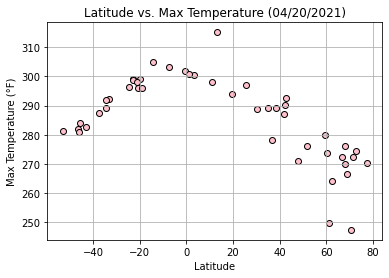

In [11]:
# Create Plot 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="pink", marker="o", edgecolor="black")

# Label plot and annotate the line equation
plt.title("Latitude vs. Max Temperature (04/20/2021)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")

plt.grid()

# Save Figure
plt.savefig("../Images/Latitude vs Max Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

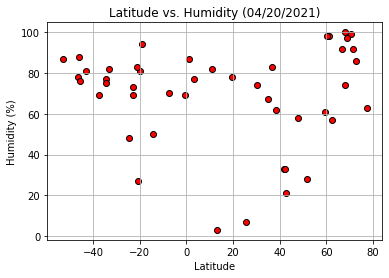

In [12]:
# Create Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="red", marker="o", edgecolor="black")
# # Label plot and annotate the line equation
plt.title("Latitude vs. Humidity (04/20/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save Figure
plt.savefig("../Images/Latitude vs Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

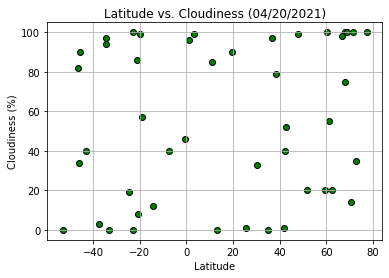

In [13]:
# Create Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="green", marker="o", edgecolor="black")

# Label plot and annotate the line equation
plt.title("Latitude vs. Cloudiness (04/20/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save Figure
plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

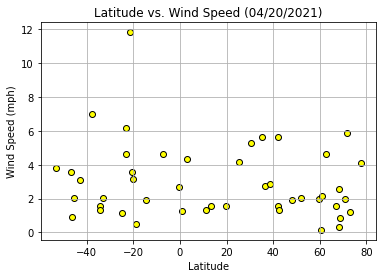

In [14]:
# Create Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Label plot and annotate the line equation
plt.title("Latitude vs. Wind Speed (04/20/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save Figure
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

# Show Plot
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]
northern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Altay,99,CN,1619281717,58,47.8667,88.1167,270.94,1.93
4,Matamoros,1,MX,1619281718,7,25.5333,-103.2500,297.15,4.17
5,Dingle,85,PH,1619281696,82,10.9995,122.6711,298.20,1.35
8,Say,0,NE,1619281719,3,13.1007,2.3689,315.15,1.54
11,Nikolskoye,20,RU,1619281656,61,59.7035,30.7861,279.82,2.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7019535992990322


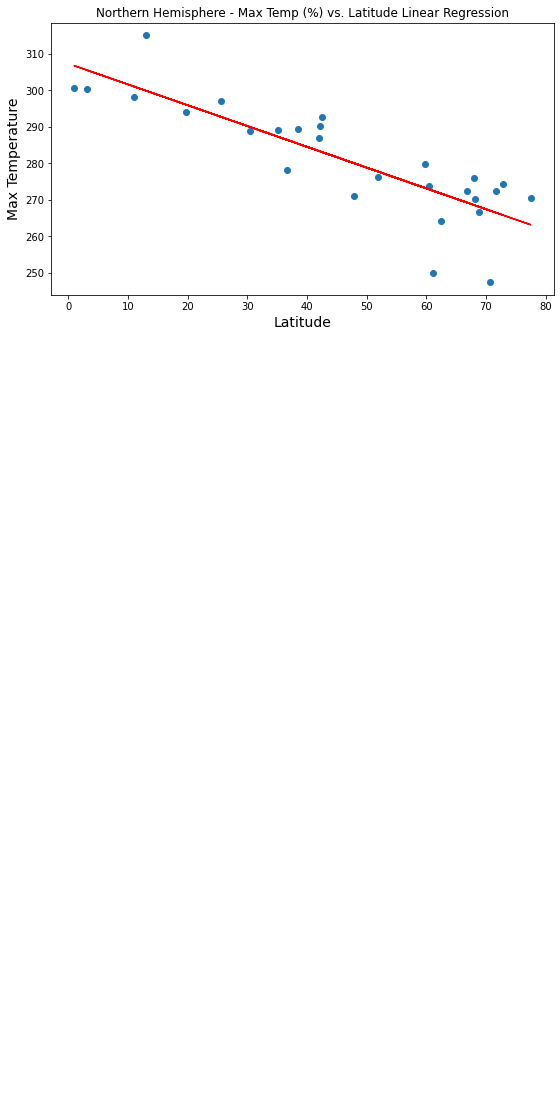

<Figure size 432x288 with 0 Axes>

In [16]:
# latitudes for cities in the Northern Hemisphere - Max Temp vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Northern Hemisphere - Max Temp (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(20,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Max Temperature", fontsize =14)


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression (mph).png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.9011216198728137


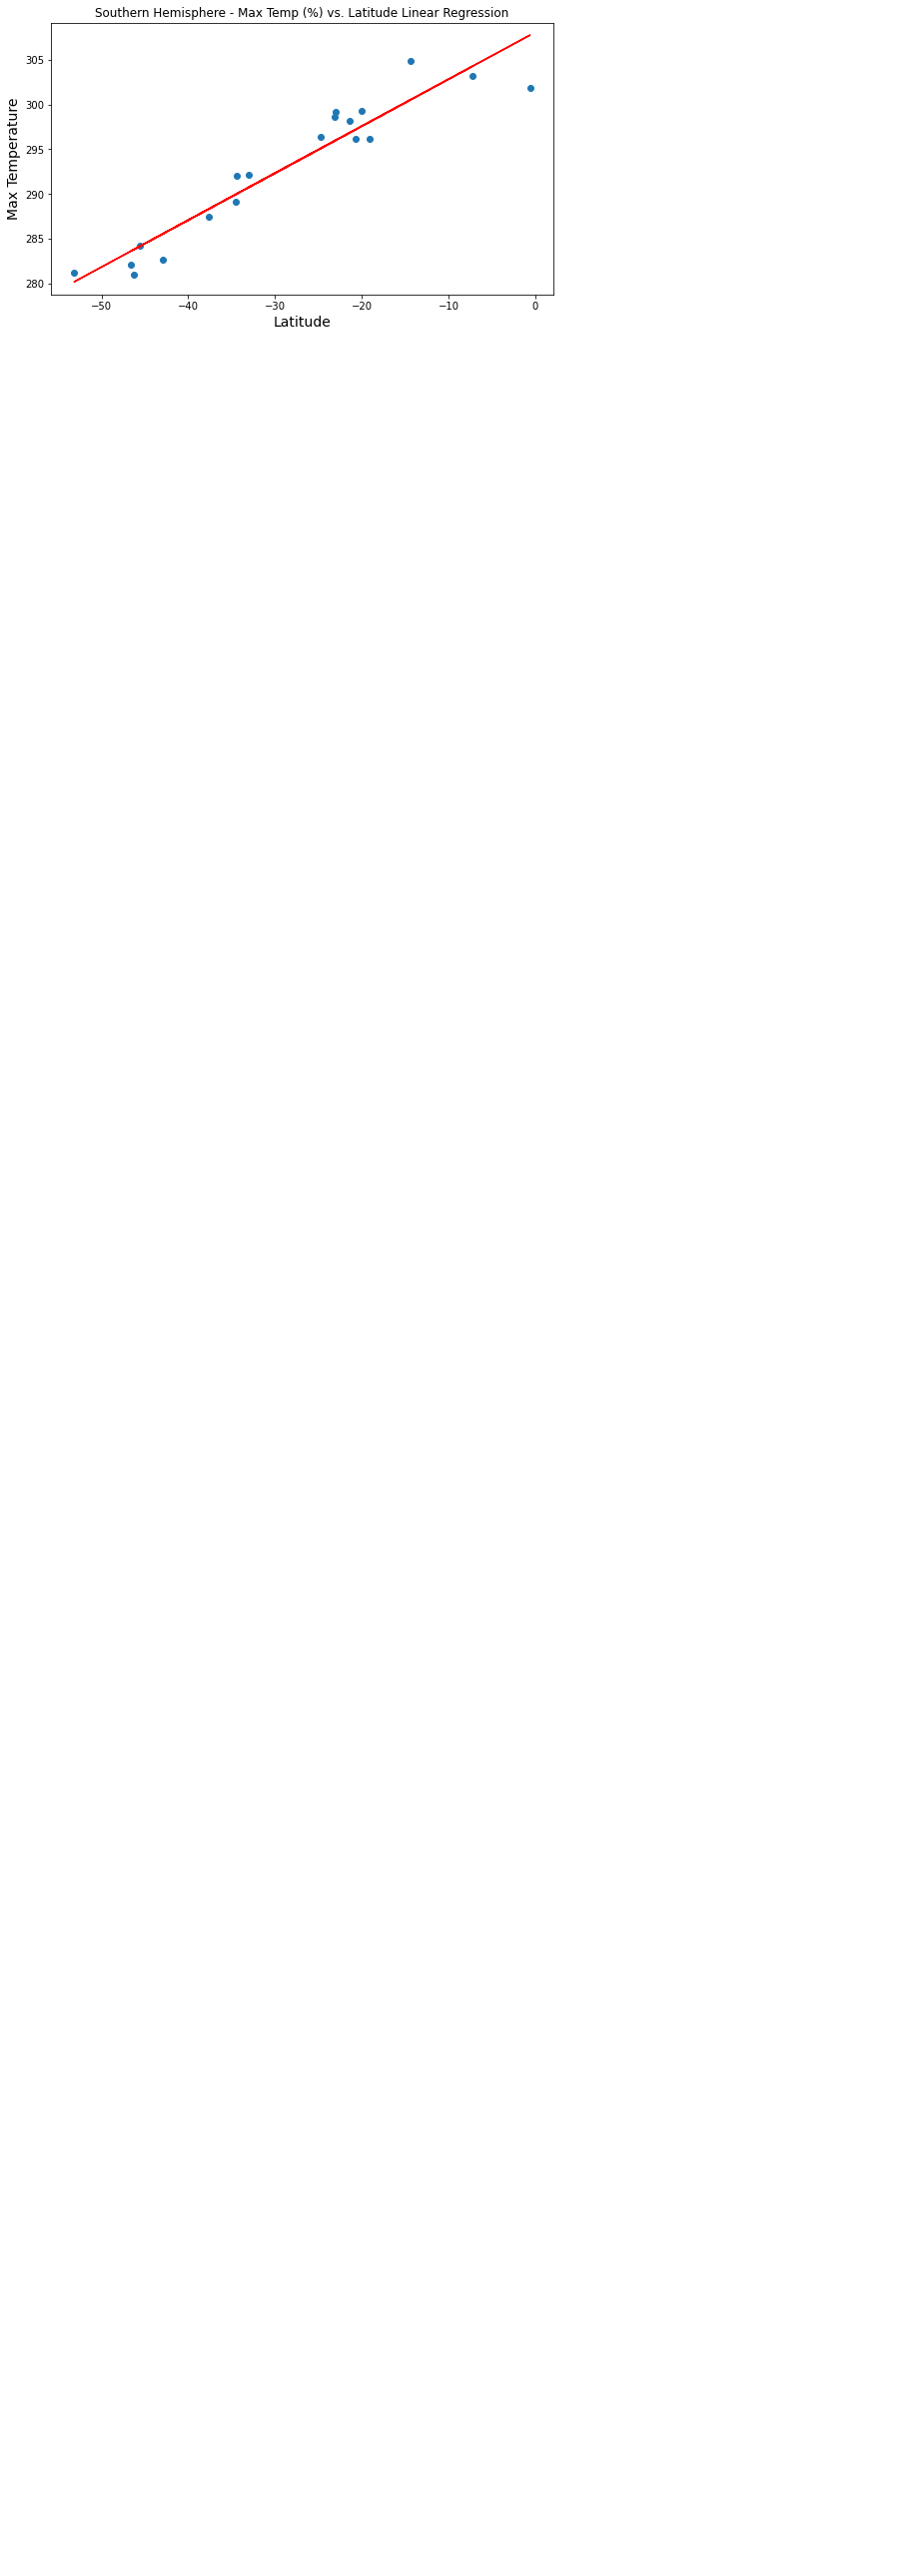

<Figure size 432x288 with 0 Axes>

In [17]:
# Latitudes for cities in the Southern Hemisphere - Southern Hemisphere - Max Temp vs. Latitude Linear Regression
latitude = southern_hemisphere["Lat"]
temperature = southern_hemisphere["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Southern Hemisphere - Max Temp (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(20,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Max Temperature", fontsize =14)


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression (mph).png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1100608918561416


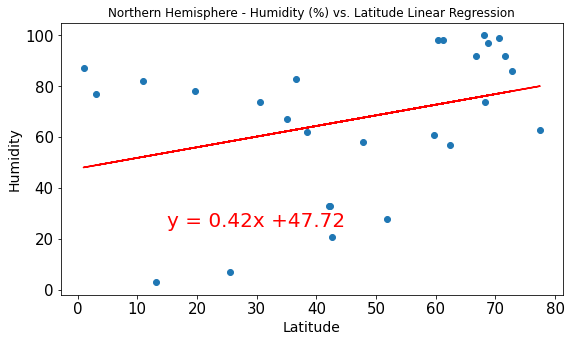

<Figure size 432x288 with 0 Axes>

In [18]:
# latitudes for cities in the Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Humidity", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression (mph).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1100608918561416


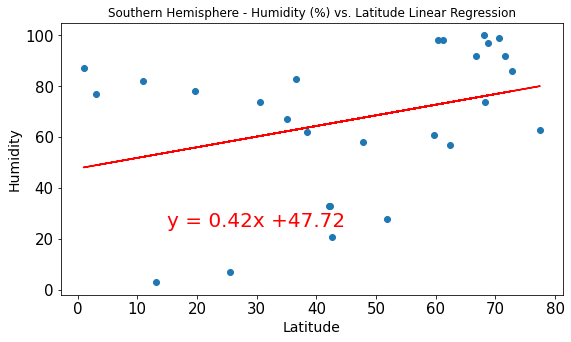

<Figure size 432x288 with 0 Axes>

In [19]:
# latitudes for cities in the Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Humidity", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression (mph).png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005081967056693422


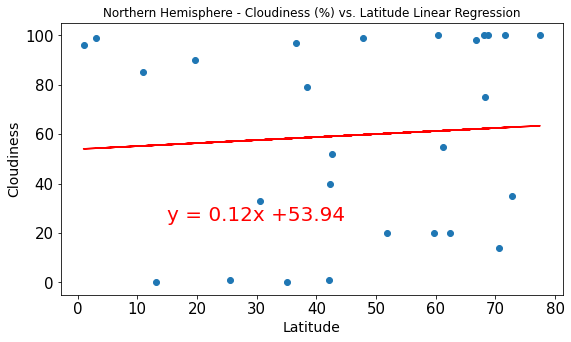

<Figure size 432x288 with 0 Axes>

In [20]:
# latitudes for cities in the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Cloudiness", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


# Save Figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (mph).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005081967056693422


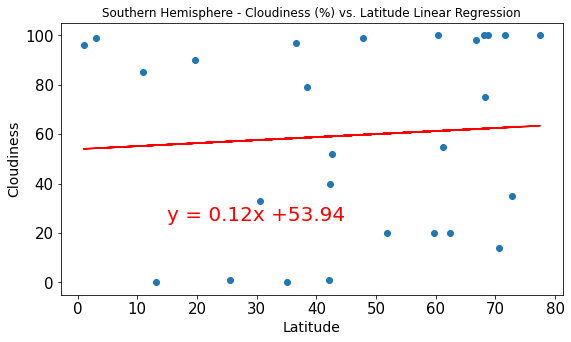

<Figure size 432x288 with 0 Axes>

In [21]:
# latitudes for cities in the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Cloudiness", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (mph).png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005599542256019572


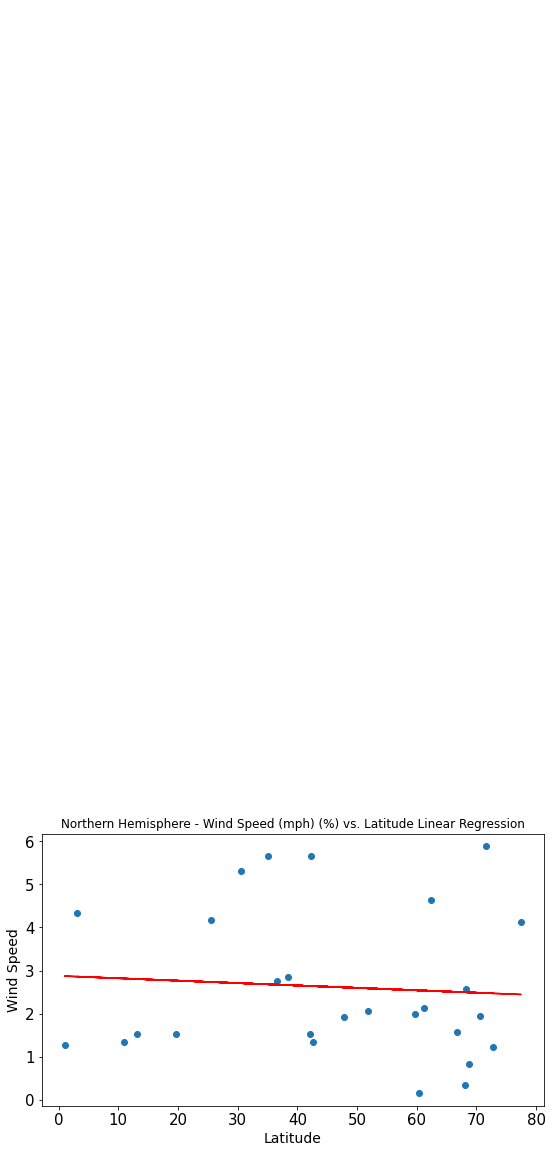

<Figure size 432x288 with 0 Axes>

In [22]:
# latitudes for cities in the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
latitude = northern_hemisphere["Lat"]
temperature = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Northern Hemisphere - Wind Speed (mph) (%) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Wind Speed", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save Figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (mph).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015806635091044637


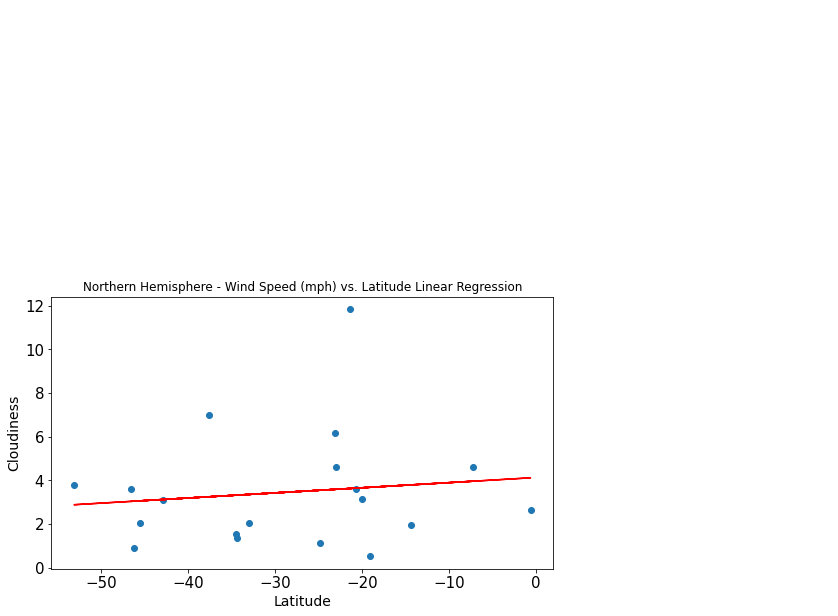

<Figure size 432x288 with 0 Axes>

In [23]:
# latitudes for cities in the Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
latitude = southern_hemisphere["Lat"]
temperature = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude, temperature)

# Get regression values
regress_values = latitude * slope + intercept
    
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
# Create Plot
plt.figure(figsize=(9,5))
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.scatter(latitude,temperature)
plt.plot(latitude,regress_values,"r-")

# Label plot and annotate the line equation  
plt.annotate(line_eq,(15,25),fontsize=20,color="red")

plt.xlabel("Latitude", fontsize =14)
plt.ylabel("Cloudiness", fontsize =14)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# Save Figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (mph).png")